In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dirtydata=pd.read_csv('product_sales.csv')
print(dirtydata.shape)
print(dirtydata['revenue'].median())
#print(dirtydata.info())
#dirtydata.head()
#print(dirtydata['state'].value_counts())
#print(dirtydata['state'].isna().sum())

(15000, 8)
89.5


### Data Validation
The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

* week: 6 weeks without missing values, same as the description. No cleaning is needed.
  
* sales_method: Before cleaning: 5 categories with spelling errors, were corrected to give the 3 unique categories as the description specified.
              After cleaning: 3 unique categories without missing values, column is inline with description.
  
* customer_id: character values without missing values,the unique identifier, same as the description. No cleaning is needed.
 
* nb_sold: numeric values, same as the description. No cleaning is needed.
* revenue: Before cleaning: numeric values, with 1074 null values and 13926 non-null values. null values was replaced with the median of revenue(89.5) because  the percentage of missing values was high and the revenue column has a normal distribution.
          After cleaning: numeric values, without missing values, column is inline with the description.
* years_as_customer: Before cleaning: numeric values, 2 rows filtered out because they did not meet description criteria. i.e 2 rows with values>= 40 years (2024-1984=40).
          After cleaning:numeric without missing values, column is in line with description.
* nb_site_visits: numeric values, same as the description. No cleaning is needed.
* state: 50 unique values without missing values, sames as description. No cleaning is needed.


After the data validation, the dataset contains 14998 rows and 8 columns without missing values.

In [3]:
df=pd.read_csv('product_sales_clean.csv')
df.shape

(14998, 8)

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

# How many customers were there for each approach?

**Approximately half of the customers were approached only by Email with a total count of 7465 customers. The Call only approach made up about 33 percent of the total customer count with a value of 4961 customers and The Email + Call approach has the least customer count of 2572 customers which about 17 percent of the total population.** 


In [4]:
# Count of customers by sales method
cust_by_approach = df.groupby('sales_method')['customer_id'].count()
#print("Customer count by approach:\n", cust_by_approach)

# Percentage of total customers by sales method
cust_by_approach_perc = cust_by_approach / df['customer_id'].nunique() * 100

# Combine both Series into a single DataFrame
cust_pivot = pd.concat([cust_by_approach, cust_by_approach_perc], axis=1)
cust_pivot.columns = ['Customer Count', 'Percentage of Total']
cust_pivot

,Customer Count,Percentage of Total
sales_method,,
Call,4961,33.077744
Email,7465,49.773303
Email + Call,2572,17.148953


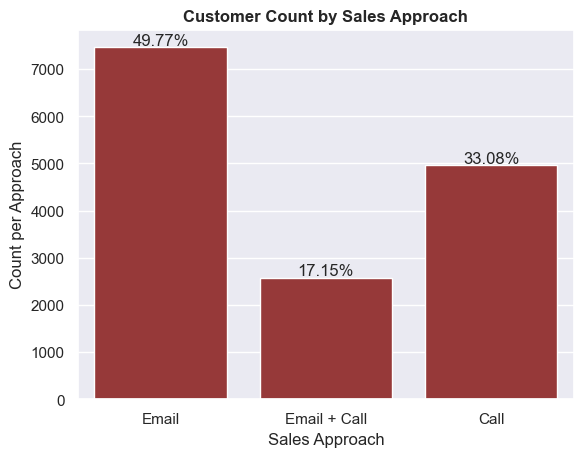

In [5]:

# Set the theme
sns.set_context("notebook")
sns.set_theme(style='darkgrid')

# Create the plot
plot = sns.countplot(data=df, x='sales_method', color='Brown')

# Customisation of the plot
plt.title('Customer Count by Sales Approach', fontweight='bold')
plt.xlabel('Sales Approach')
plt.ylabel('Count per Approach')

# Add percentage labels inside the plot
total_customers = cust_by_approach.sum()
for p in plot.patches:
    percentage = f'{p.get_height() / total_customers * 100:.2f}%'
    plot.annotate(percentage, 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', 
                  xytext=(0, 5), 
                  textcoords='offset points')

# Show the plot
plt.show()

# Save the plot as jpg
# plt.savefig('CustomerbyApproach.jpg', format='jpg', dpi=300, bbox_inches='tight')

## What does the spread of the revenue look like overall? And for each method?


In [6]:

standard_dev=df['revenue'].std()
range_rev= df['revenue'].max()-df['revenue'].min()

def ranged(series):
    """function to find the difference between the maximum and minimum values """
    return series.max()-series.min() 
print(f"Spread of revenue across all Sales Approach using standard deviation is {standard_dev}")
print(f"The difference between the Maximum revenue and minimum revenue is {range_rev} ")

#df.groupby('sales_method')['revenue'].agg(['std','var'])
pivot_df=df.pivot_table(values='revenue',index='sales_method',aggfunc=['sum','std',ranged],margins=True)
pivot_df.columns = ['Total_Revenue','Standard_deviation_of_revenue', 'Range_of_revenue']
pivot_df

Spread of revenue across all Sales Approach using standard deviation is 45.721456660651214
The difference between the Maximum revenue and minimum revenue is 205.78 


,Total_Revenue,Standard_deviation_of_revenue,Range_of_revenue
sales_method,,,
Call,243712.52,11.540187,56.96
Email,720908.61,10.975578,70.14
Email + Call,439492.19,42.084163,148.82
All,1404113.32,45.721457,205.78


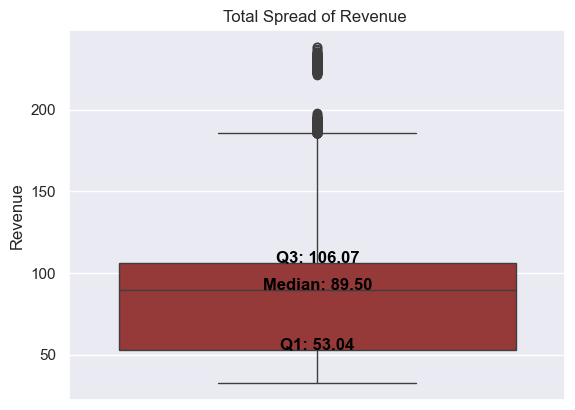

In [7]:


sns.boxplot(y='revenue', data=df,color='brown')

quartiles = df['revenue'].quantile([0.25, 0.5, 0.75])
labels = [f'Q1: {quartiles[0.25]:.2f}', f'Median: {quartiles[0.5]:.2f}', f'Q3: {quartiles[0.75]:.2f}']

# Add quartile labels to the plot
for i, label in enumerate(labels):
    plt.text(0, quartiles.iloc[i], label, horizontalalignment='center', size=12, color='black', weight='semibold')

plt.title('Total Spread of Revenue ')
plt.ylabel('Revenue')
plt.show()

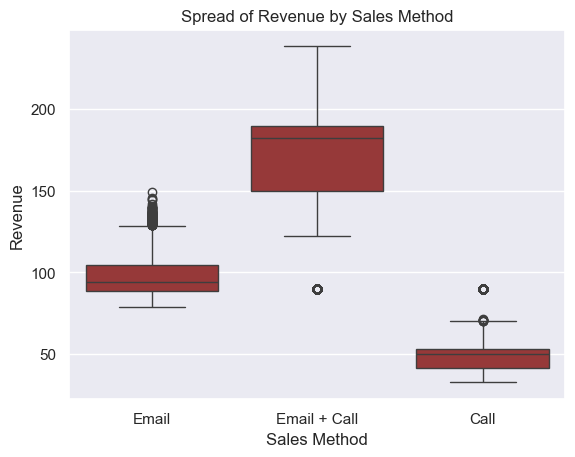

In [8]:
#sns.barplot(x='sales_method',y='revenue',data=df)


ax=sns.boxplot(x='sales_method', y='revenue', data=df,color='brown')

# Extracting quartile values
for i, box in enumerate(ax.artists):
    # Extract the y-values of the box components
    ydata = box.get_ydata()
    
    # The indices for quartiles may vary; manually inspect to determine correct indices
    print(f'Box {i}: {ydata}')

    # Example indices (adjust as necessary):
    q1 = ydata[1]  # First quartile (25th percentile)
    median = ydata[4]  # Median (50th percentile)
    q3 = ydata[6]  # Third quartile (75th percentile)
    
    # Annotate the plot
    ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='blue')
    ax.text(i, median, f'Median: {median:.2f}', ha='center', va='bottom', color='black')
    ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', color='red')

plt.title('Spread of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()


The **Email + Call** method shows the highest median revenue, indicating it's typically the most effective at generating revenue. However, it also has the greatest variability, signifying that the results can be quite inconsistent. Its average revenue is lower than the median, suggesting that while it can achieve high revenues, there are also many lower revenue results.

On the other hand, the **Email** and **Call** methods have similar median revenues but are more consistent. The Email method has a few high-revenue outliers, while the Call method has a higher average revenue compared to its median, indicating that while it mostly achieves lower revenue, there are few results with high revenue.

***In summary, the Email + Call method offers a wider range of revenue outcomes but with more variability, while the Email and Call methods provide more consistent, though generally lower, revenues.***


## Was there any difference in revenue over time for each of the methods?


In [9]:
df_time= df.groupby(['week','sales_method'])['revenue'].sum()

df_time=df_time.to_frame()


<Figure size 4000x600 with 0 Axes>

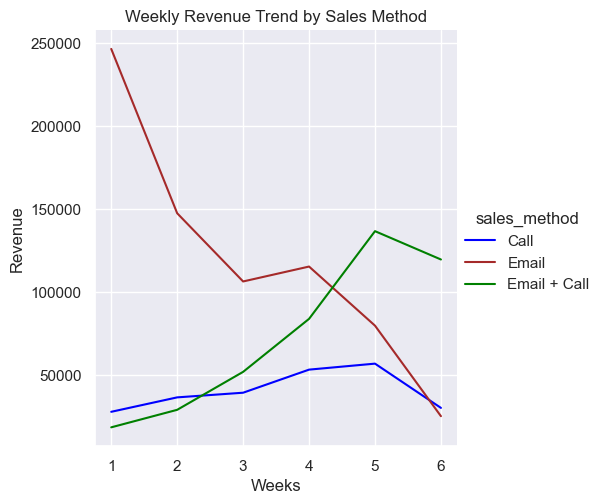

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(40, 6))

custom_palette = ['blue', 'brown', 'green']
sns.relplot(x='week', y='revenue', data=df_time, kind='line',hue='sales_method',palette = custom_palette)
plt.title('Weekly Revenue Trend by Sales Method')
plt.xlabel('Weeks')
plt.ylabel('Revenue')
plt.show()


plt.savefig('WeeklyRevenuebySales_method.jpg', dpi=300,bbox_inches='tight')

##### This line chart shows the weekly revenue trends for three different sales methods: Call, Email, and a combination of Email + Call, over a six-week period. Each line represents a sales method, allowing us to compare their performance in terms of revenue generation over time.
**We can observe** that the **Email** method started with the highest revenue but recorded a steady decline in total revenue over the weeks, In comparison, **Email + Call** method showed significant growth in total revenue, peaked around week 5 before a slight drop.The **Call** recorded a relatively steady growth in total revenue throught out the 6 week period. This implies that although the Email + Call method might enhance revenue over time, relying only on emails may not sustain high revenue levels. 


### Other difference between customers in each Sales method

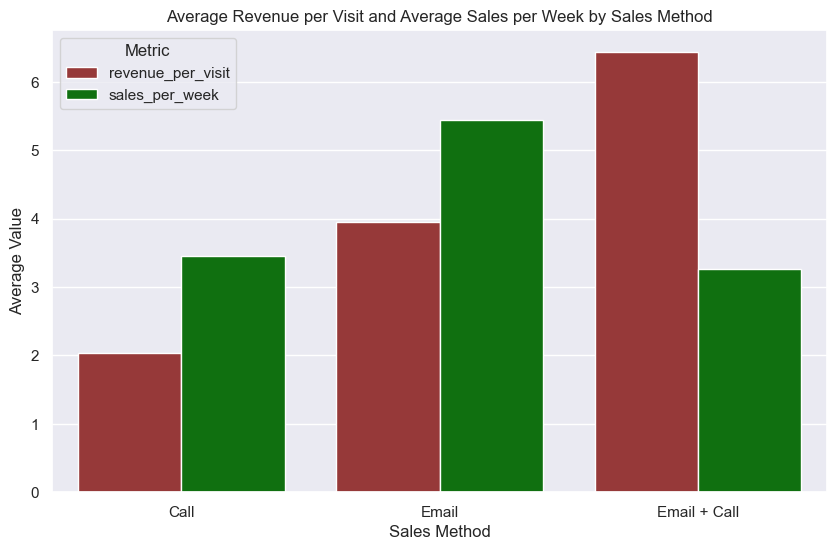

In [11]:
#Create columns
df['revenue_per_visit'] = df['revenue'] / df['nb_site_visits']
df['sales_per_week'] = df['nb_sold'] / df['week']

# Group by sales_method
df_grouped1 = df.groupby('sales_method')[['revenue_per_visit', 'sales_per_week']].mean()

# Reset index to make 'sales_method' a column again
df_grouped1 = df_grouped1.reset_index()

# Melt the DataFrame to long format
df_melted = df_grouped1.melt(id_vars='sales_method', var_name='Metric', value_name='Value')


custom_palette = ['brown', 'green']
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='Value', hue='Metric', data=df_melted,palette = custom_palette)

# customize
plt.xlabel('Sales Method')
plt.ylabel('Average Value')
plt.title('Average Revenue per Visit and Average Sales per Week by Sales Method')
plt.show()


In [12]:
# Create bins and labels for binning 'years_as_customer'
bins = list(np.arange(0, 41, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Apply binning to the 'years_as_customer' column
df['year_binned'] = pd.cut(df['years_as_customer'], bins=bins, labels=labels, right=True)

# Group and prepare data
df_perf = df.groupby(['year_binned', 'sales_method'], observed=False)['nb_sold'].sum().reset_index()
df_perf

,year_binned,sales_method,nb_sold
0,0-4,Call,26971
1,0-4,Email,41676
2,0-4,Email + Call,18387
3,5-9,Call,10154
4,5-9,Email,15362
5,5-9,Email + Call,5653
6,10-14,Call,3871
7,10-14,Email,5366
8,10-14,Email + Call,2149
9,15-19,Call,1246


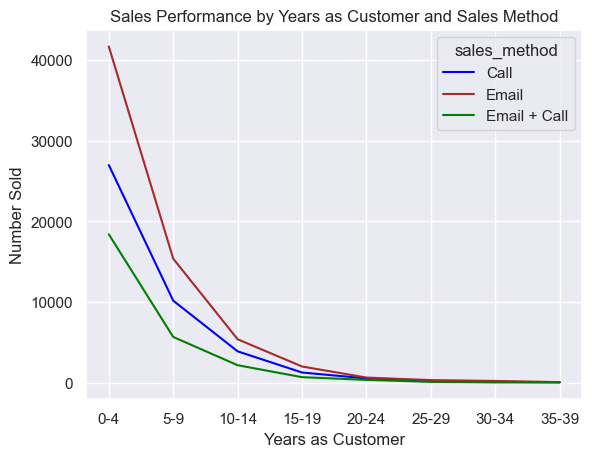

In [13]:


# Set a custom color palette
custom_palette = ['blue', 'brown', 'green']

# Plotting the lineplot
sns.lineplot(x='year_binned', y='nb_sold', data=df_perf, hue='sales_method', palette=custom_palette)
plt.title('Sales Performance by Years as Customer and Sales Method')
plt.xlabel('Years as Customer')
plt.ylabel('Number Sold')
plt.show()

#### Interpretation of the Plot
This plot shows the relationship between the number of products sold and the length of time customers have been with the company, divided into three different sales methods: Call, Email, and Email + Call. The plot indicates that the highest number of products sold occurs with newer customers, particularly those who have been with the company for 0 to 4 years.

#### Summary for a Non-Technical Audience
As customers remain with the company longer, the number of products sold to them tends to decrease significantly across all sales methods. The Email method shows the highest number of sales initially, but all methods see a sharp decline after the first few years. This suggests that focusing on new customers might be more effective for driving sales, regardless of the sales method used.

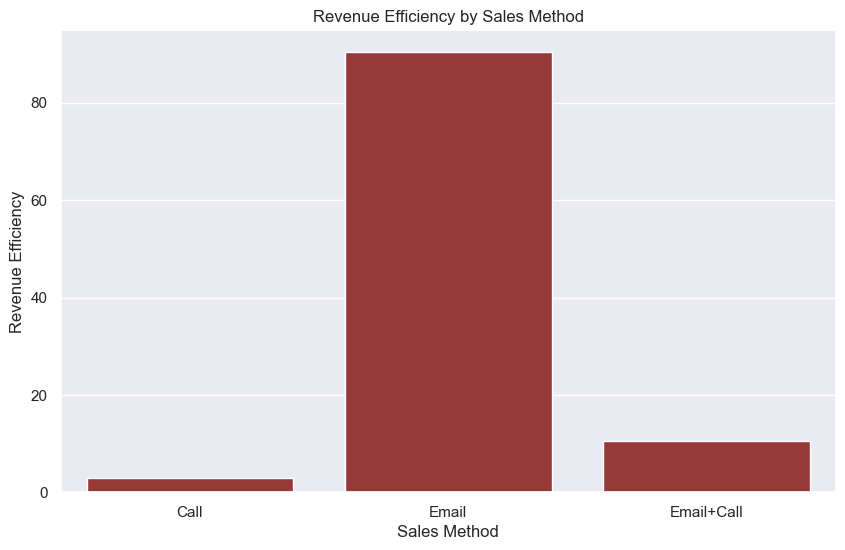

In [14]:

# revenue efficiency which is the total revenue divided by total time spent grouped by sales_method where sales methods and time spent on each are Call=30 mins,Email<1 min,Email+Call= 10 mins per customer

# Define time spent (in minutes) for each sales method
time_spent = {
    'Call': 30,
    'Email': 1,  # Less than 1 minute
    'Email+Call': 10
}

# Define data
data = {
    'sales_method': ['Call', 'Email', 'Email+Call'],
    'num_customers': [4961, 7465, 2572],
    'total_revenue': [439492, 674702, 268919]  # Adjusted to match example
}

# Create a DataFrame
df2 = pd.DataFrame(data)

# Calculate total time spent for each method
df2['total_time_spent'] = df2['num_customers'] * df2['sales_method'].map(time_spent)

# Calculate revenue efficiency
df2['revenue_efficiency'] = df2['total_revenue'] / df2['total_time_spent']

df2[['sales_method', 'revenue_efficiency']]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='revenue_efficiency', data=df2,color='brown')

# Adding labels and title
plt.xlabel('Sales Method')
plt.ylabel('Revenue Efficiency')
plt.title('Revenue Efficiency by Sales Method')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

# Define the data
data = {
    'sales_method': ['Email+Call', 'Email', 'Call'],
    'num_customers': [4961, 7465, 2572],
    'total_revenue': [439492.19, 720908.61, 243712.52]
}

# Create a DataFrame
df3 = pd.DataFrame(data)

# Map sales methods to numeric values for linear regression
method_mapping = {'Email+Call': 1, 'Email': 2, 'Call': 3}
df3['sales_method_numeric'] = df3['sales_method'].map(method_mapping)

# Define predictor (X) and target (y)
X = df3[['sales_method_numeric']]
y = df3['total_revenue']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the revenue for Email+Call if all customers use this method
email_call_numeric = method_mapping['Email+Call']
predicted_revenue_email_call = model.predict([[email_call_numeric]])[0]

# Estimate the expected total revenue if all customers used Email+Call
total_customers = 14998
expected_total_revenue = predicted_revenue_email_call * total_customers / df3[df3['sales_method'] == 'Email+Call']['num_customers'].values[0]

print(f"Expected Total Revenue if all customers use Email+Call: ${expected_total_revenue:,.2f}")


Expected Total Revenue if all customers use Email+Call: $1,710,901.49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Business Metrics
Since our goal is to optimise our time and resources,leading to better allocation of resources and improved overall profitability. I would recommend **Revenue Efficiency** as our metric.

Based on my analysis on the data provided for the past 6 weeks, I recommend the use of **Email + Call** sales method, As shown in the "Weekly Revenue Trend by sales method" relying only on Email may not sustain high revenue levels and the Call method is not efficient as it consumes the most time.

Expected Total Revenue if all customers use Email+Call is 1,710,901.49 dollars compared to the current total revenue 1,404,113.32 dollars.


## Recommendation
**For the following weeks, I would recommend we can focus on the following steps:**

* To quickly implement the campaign, we should strategically promote the sales methods with the highest revenue efficiency in the market:
  * Emphasize on methods like Email+Call that deliver high revenue with minimal time investment and appeals to both cost-conscious and time-conscious customers.
  * Target segment most likely to respond to the efficient methods(customer with less than 10 years)
* Use key metrics to monitor the if the Email+Call method records an increase in total revenue as predicted.
* Optimize the call duration to reduce the time spent per customer.
* Enhance customer retention over the years.
* Data Collection for in-depth analysis
  *  Improve data quality: What other customer demographics and feedback can improve the insights generated? eg. Age,Income level.
  *  Balance the data across the various sales methods and increase the data size.es